## Abstract

In this lab, our goal was to identify absorbtion lines in the solar spectrum (also known as Fraunhofer lines). We did this by first creating calibration images using a neon lamp and fitting known neon lines to our emission spectrum. By doing this, we created a formula that related the pixels in the images to actual wavelengths, which we used to help identify the absoption lines in our solar spectrum. By doing this learned about the imprtance of optical spectroscopy and how we can use it to find the compositions of objects in the sky. We also learned (through our errors) how important it is to make sure that all of our equipment is working effectively.

## Introduction

It is often important to find out what chemical components make up certain objets in the sky. We can do this by looking at the emission or absoption lines that come from a certain object. Looking at these will give us an indication of the elements present in that object. In this lab, we will be using the telescope to identify a few of the lines in the solar spectrum. We will do this by using a neon lamp to create calibration frames. We can use these frames to relate the pixel values in our frames to actual wavelengths. We will then apply this formula to our solar images so that we can identify absorption lines in our solar spectrum.

## Theory

In class, we talked about the different types of spectrographs that can vary in resolution. This can be determined by using the grating equation given below.

$\Delta s=dsin(\alpha)+dsin(\beta)=m\lambda$

This equation can be rearranged as:

$sin(\beta)= \frac{m}{d}\lambda-sin(\alpha)$

Where $\frac{m}{d}$ is the resolution of our spectrograph.

In this equation, d is the groove spacing, $\alpha$ is the incident angle, $\beta$ is the reflective angle, $\lambda$ is the wavelength, and m is the diffractive order.

In this lab, we used a calibration lamp to calculate the wavelength scale. The calibration lamp for our lab was the emission lines of neon. Once we find our spectrum, we can use the wavelengths of known neon lines and try to match the spikes in the spectrum as best we can to the lines through the use of a formula. Our images are 1530 pixels wide so by adding and multiplying some numbers we can convert the pixel values to actual wavelengths. 

It must be noted that the strongest lines are not always those with the highest abundance in the star. Looking at the list of major Fraunhofer lines on Wikipedia, we see that the majority of the lines are from metals (including Hydrogen). Even in our own data, most of the lines were oxygen. This occurs for a number of reasons but in the case of our oxygen lines it is because those lines are scattered light from the sun rather than coming directly from the star.

## Experiment and Methodology

Note: Even though the instuctions say to log the y-axis of our graphs but we decided not to do so because not doing so makes the graphs look better. Also, due to problems with the micrometer setting on the spectrograph our data was limited to a wavelength range of around 6000-8000 angstroms.

In [1]:
# These are all the necessary library calls needed to complete this lab.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
rc("figure",figsize=(12,9))
from astropy.io import fits
import numpy as np
from pylab import genfromtxt

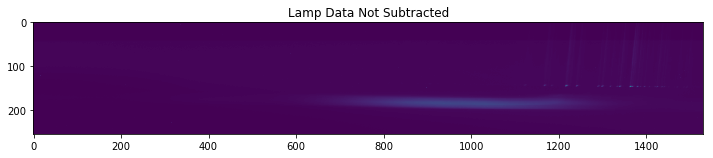

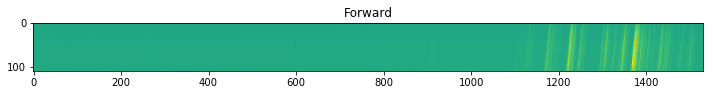

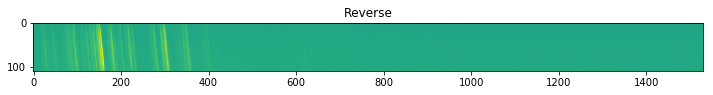

In [2]:
# This code reads in both the calibration and the bckground frames for the neon lamp, as well as the bias frames.
skylabBias = []
for i in range(1,10):
    skylabBias.append(fits.getdata("skylabBias0000000{}.fit".format(i) , ext=0).astype(np.int))
for i in range(10,11):
    skylabBias.append(fits.getdata("skylabBias000000{}.fit".format(i) , ext=0).astype(np.int))

skylabLamp = []
for i in range(11,14):
    skylabLamp.append(fits.getdata("skylabSGSNoTarget000000{}.fit".format(i) , ext=0).astype(np.int))

skylabNoLamp = []
for i in range(14,17):
    skylabNoLamp.append(fits.getdata("skylabSGSNoTarget000000{}.fit".format(i) , ext=0).astype(np.int))

# This averages the three background frames for the neon lamp.
avskylabNoLamp = sum(skylabNoLamp)/3

# This averages the three calibration images for the neon lamp.
avskylabLamp = sum(skylabLamp)/3

# This for loop takes the three calibration images and subtracts them by the average of the background frames.
subskylabLamp = []
for i in range(3):
    subskylabLamp.append(skylabLamp[i]-avskylabNoLamp)

# This takes the average of the calibration images (background subtracted) to create a new image.
avsubskylabLamp = sum(subskylabLamp)/3

# This code displays the images of the average frames (with and without the background subtracted).
plt.imshow(avskylabLamp)
plt.title("Lamp Data Not Subtracted")
plt.show()

plt.imshow(avsubskylabLamp)
plt.title("Subtracted Lamp Data")
plt.show()

# This code reverses the images and displys them so that the shorter wavelengths are on the right side.
favsubskylabLamp = avsubskylabLamp[0:110, :]
ravsubskylabLamp = avsubskylabLamp[0:110,::-1]

plt.imshow(favsubskylabLamp)
plt.title("Forward")
plt.show()

plt.imshow(ravsubskylabLamp)
plt.title("Reverse")
plt.show()






These images show the averages of the calibration frames (one without the background frames subtracted and one were the background frames are subtracted). As we can see from the images above, subtracting the background images makes the lines easier to see. The forward and reverse images are just the top 110 rows of the frame (these contain the neon lines we care about). We reverse the image so that we can have the shorter wavelengths on the left side of the image.

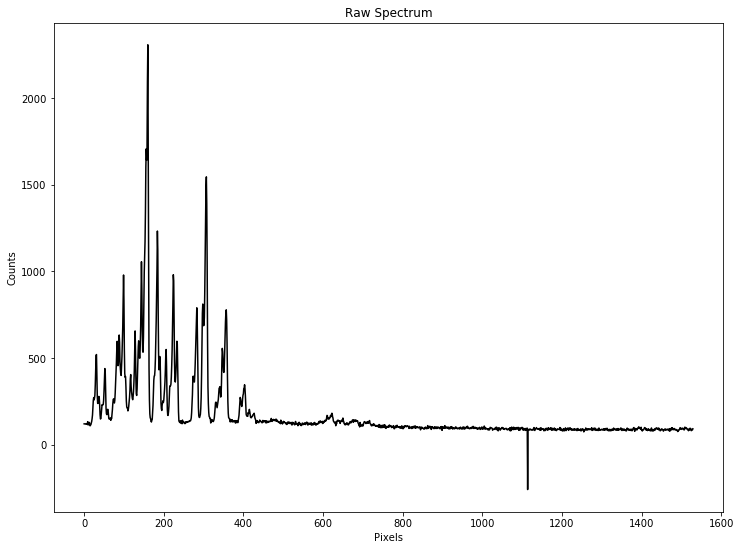

In [3]:
# This code reads in the data from various rows in the reverse image and averages them.
vec1 = ravsubskylabLamp[85, :]
vec2 = ravsubskylabLamp[86, :]
vec3 = ravsubskylabLamp[87, :]
vec4 = ravsubskylabLamp[88, :]
vec5 = ravsubskylabLamp[89, :]
vec6 = ravsubskylabLamp[90, :]
vec7 = ravsubskylabLamp[91, :]
vec8 = ravsubskylabLamp[92, :]
vec9 = ravsubskylabLamp[93, :]
vec10 = ravsubskylabLamp[94, :]
vec11 = ravsubskylabLamp[95, :]
addvec = vec1 + vec2 + vec3 + vec4 + vec5 + vec6 + vec7 + vec8 + vec9 + vec10 + vec11
avgvec = addvec/11

# This code reads in the neon lines from 6000-8000 angstroms.
mat0 = genfromtxt("neon_jdm.txt")
vcols = mat0[:,0]

# This code helps to define the x-axis (in pixels) of the raw spectrum plot.
numberofcols = len(avgvec)
column = np.arange(numberofcols)

# This plots the raw spctrum.
plt.plot(column, avgvec,color='k')
plt.title("Raw Spectrum")
plt.xlabel('Pixels')
plt.ylabel('Counts')
plt.show()


# This line is how we scale the plot so that the neon lines line up with the peaks in the plot.
x = (5710/(4.3) + np.arange(1530))*4.3

# This code plots the distribution.
plt.plot(x, avgvec,color='k')
plt.xlim(6000,8000)
plt.title("Calibrated Spectrum")
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Counts')
for col in vcols:
    plt.axvline(col, color='r')
plt.show()

The first image is the raw spectrum while the second image is calibrated to fit the neon emmission lines and the x-axis is changed from pixels to angstroms. The red lines represent neon emmission lines ranging from around 6000-8000 Angstroms. If we were to compare this to another neon emmision spectrum, we would see that the relative brightness of the lines would vary, which is due to differences in the temperature and the density of the gas. To calibrate the spectrum to the neon lines, I used the 7024.0504, 7032.4131, 7173.9381, and the 7245.1666 angstrom neon lines and tried to line them up with the peaks located at the various pixel values. For the respctive wavelegths given above, the pixel values are 306, 308, 340, and 357.

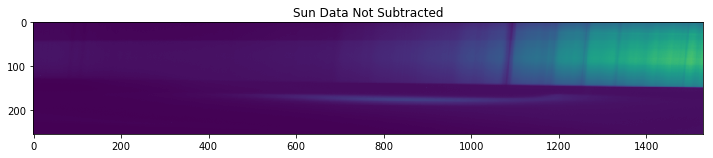

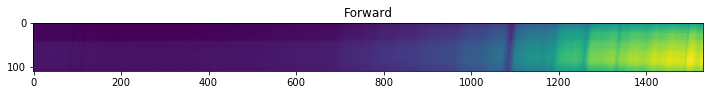

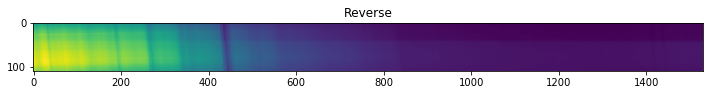

In [4]:
# This code reads in the solar images as well as the dark frames.
skylabSky = []
for i in range(17,22):
    skylabSky.append(fits.getdata("skylabSGSNoTarget000000{}.fit".format(i) , ext=0).astype(np.int))
    
skylabDark = []
for i in range(22,27):
    skylabDark.append(fits.getdata("skylabDark000000{}.fit".format(i) , ext=0).astype(np.int))

# This code averages the five dark frames.
avskylabDark = sum(skylabDark)/5

# This code averages the five solar images.
avskylabSky = sum(skylabSky)/5

# This for loop takes the five solar images and subtract them by the average of the dark frames.
subskylabSky = []
for i in range(3):
    subskylabSky.append(skylabSky[i]-avskylabDark)

# This takes the solar images (dark frames subtracted) and averages them to create a new image.
avsubskylabSky = sum(subskylabSky)/5

# This displays the averege solar images (with and without the dark frames subtracted) for comparison.
plt.imshow(avskylabSky)
plt.title("Sun Data Not Subtracted")
plt.show()

plt.imshow(avsubskylabSky)
plt.title("Subtracted Sun Data")
plt.show()

# This code reverses the images and displys them so that the shorter wavelengths are on the right side.
favsubskylabSky = avsubskylabSky[0:110, :]
ravsubskylabSky = avsubskylabSky[0:110,::-1]

plt.imshow(favsubskylabSky)
plt.title("Forward")
plt.show()

plt.imshow(ravsubskylabSky)
plt.title("Reverse")
plt.show()






For these images, we followed the same process as the calibrated images above but using the average of the solar spectrum images instead (we subtract the dark frames instead of the background frames). Looking at the images, we saw definite absorption lines in the spectrum, which are the gaps in the continuum. However, we cannot identify the lines through this image alone. To get a better picture, we must put it on a wavelength scale and compare them to the wavelengths of known Fraunhofer lines. Some of the lines are broader than others because their abundance (in the sky, not in the star) is greater. We knew that the lines are absorption lines our spectrum is made of dips rather than spikes. We also noticed that subtracting the dark frames from the images clears up the image and makes the absorption lines easier to spot.

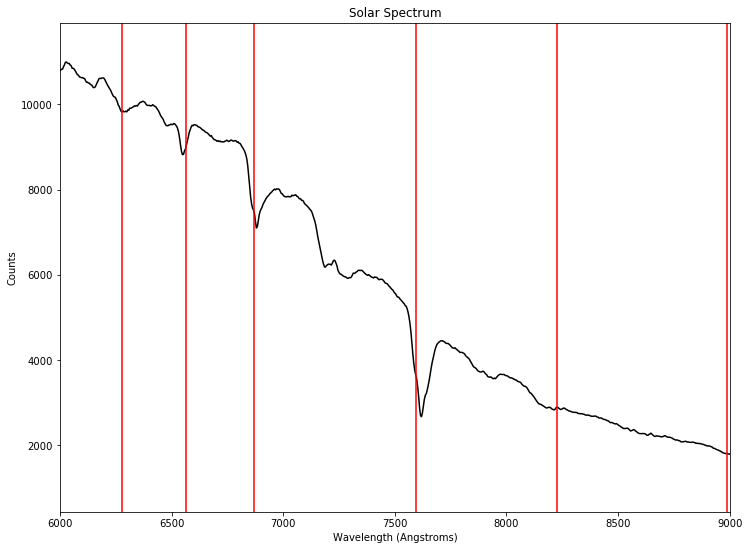

In [5]:
# This code reads in the data from various rows in the reverse image and averages them.
Sunvec1 = ravsubskylabSky[85, :]
Sunvec2 = ravsubskylabSky[86, :]
Sunvec3 = ravsubskylabSky[87, :]
Sunvec4 = ravsubskylabSky[88, :]
Sunvec5 = ravsubskylabSky[89, :]
Sunvec6 = ravsubskylabSky[90, :]
Sunvec7 = ravsubskylabSky[91, :]
Sunvec8 = ravsubskylabSky[92, :]
Sunvec9 = ravsubskylabSky[93, :]
Sunvec10 = ravsubskylabSky[94, :]
Sunvec11 = ravsubskylabSky[95, :]
Sunaddvec = Sunvec1 + Sunvec2 + Sunvec3 + Sunvec4 + Sunvec5 + Sunvec6 + Sunvec7 + Sunvec8 + Sunvec9 + Sunvec10 + Sunvec11
Sunavgvec = Sunaddvec/11

# This code reads in the major Fraunhofer lines that are around 6000-8000 angstroms.
Suncols = [6276.61, 6562.81, 6867.19, 7593.70, 8226.96, 8987.65]

# This line is how we scale the plot so that the neon lines line up with the dips in the plot.
x = (5710/(4.3) + np.arange(1530))*4.3

# This code plots the distribution.
plt.plot(x, Sunavgvec,color='k')
plt.xlim(6000,9000)
plt.title("Solar Spectrum")
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Counts')
for col in Suncols:
    plt.axvline(col, color='r')
plt.show()

This plots the solar spectrum over the 6000-8000 angstrom wavelength range with the major Fraunhofer lines identified by the red lines. We saw that the dips in our spectrum corresponed to some of the Fraunhofer lines in that range. The first was at 6562.81 angstroms (this was a H$\alpha$ line), the second was at 6867.19 angstroms (this was an O2 line), and the third was at 7593.70 angstroms (this was an O2 line). Using out scaling formula and working backwards, we saw that these lines were pixels 198, 269, and 438 respectively in the x-direction. Looking back at our image, we saw that the broadness of the lines matched up with the depths in our specturm. Our spectrum was also similar to the spectrum of the Fraunhofer lines page on Wikipedia.

The observations of my spectrum are given in the table below.

| Approximate Wavelength (Angstroms) | Approximate Width (Angstroms) | Approximate Depth (Counts) | Shape     | Corresponding Line (Element) |
|-----------------------------------:|-------------------------------|----------------------------|-----------|------------------------------|
| 6250                               | 100                           | 200                        | Gaussian  | O2                           |
| 6575                               | 50                            | 500                        | Gaussian  | H$\alpha$                    |
| 6900                               | 75                            | 900                        | Gaussian  | O2                           |
| 7600                               | 65                            | 1600                       | Gaussian  | O2                           |


It must be noted that since we were not working in an ideal wavelength range, we were not able to record some of the more important Fraunhofer lines that lie at shorter wavelengths. It must also be mentioned that (other than the H$\alpha$ line) most of the lines we recorded were not coming from the Sun itself since we were not observing it directly. Instead, we were looking at light scattered off of the sky (which explains the numerous O2 lines that were recorded). 

## Summary

In this lab, we collected a number of images using the telescope and its CCD. Among these were 3 calibration frames (using a neon lamp), 3 background frames, 5 solar frames, and 5 dark frames. We created one calibration image by subtracting the calibration frames from the background frames and averaging them. We then isolated the emission lines in the image and used them to create a raw spectrum. We then, using the neon lines given, calibrated the raw spectrum relating the pixel values to actual wavelengths. We finally used this same process to identify the solar spectrum lines in the 6000-8000 angstrom wavelength range, which were mostly oxygen. Most of the lines are not coming directly from the sun because we are looking at scattered lines from the sky. However, one of the lines (at 6562.81 angstroms) was a H$\alpha$ line which did come from the sun. This limited view was mainly due to problems with the data collection that were out of our control. 

## Conclusion

Optical Spectroscopy is very improtant to the study of Astromomy. We learned how we can use it to identify the elemental composition of Sun and we can very well use the same methods on other celestrial objects. We also learned (as this lab showed) how important it is to make sure your spectrograph and detector is working so that our data can be as accurate as possible.